
 ## Loan Status Dataset
In this Dataset, we have the data of applicants who previously applied for the loan based on the property which is a Property Loan.

The bank will decide whether to give a loan to the applicant based on some factors such as Applicant Income, Loan Amount, previous
Credit History, Co-applicant Income, etc…


About the loan_data.csv file:

 * Loan_ID: A unique loan ID.
 * Gender: Either male or female.
 * Married: Weather Married(yes) or Not Marttied(No).
 * Dependents: Number of persons depending on the client.
 * Education: Applicant Education(Graduate or Undergraduate).
 * Self_Employed: Self-employed (Yes/No).
 * ApplicantIncome: Applicant income.
 * CoapplicantIncome: Co-applicant income.
 * LoanAmount: Loan amount in thousands.
 * Loan_Amount_Term: Terms of the loan in months.
 * Credit_History: Credit history meets guidelines.
 * Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
 * Loan_Status: Loan approved (Y/N).

https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import t
from scipy import stats
from matplotlib import pyplot
import matplotlib.pyplot as plt
import scipy

print("Numpy version: ", np.__version__)
print("Pandas version: ", pd.__version__)
print("Scipy version: ", scipy.__version__)

Numpy version:  2.0.2
Pandas version:  2.2.3
Scipy version:  1.13.1


In [2]:
# !wget https://raw.githubusercontent.com/kiat/Elements-of-Data-Analytics/refs/heads/main/datasets/loan_data.csv
loans = pd.read_csv("https://raw.githubusercontent.com/kiat/Elements-of-Data-Analytics/refs/heads/main/datasets/loan_data.csv")

loans

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [4]:
loans.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


# You should use standard alpha Level for all tests, $$\alpha =0.05$$

## Task 1: Testing if the Mean Applicant Income is Less to a Specific Value

**Objective**: Determine if the mean ApplicantIncome is significantly less than $5,000.

**Parameter**: ApplicantIncome (continuous variable).

Write down what is the Hypothesis for this test, and follow the **5-Steps** for this test.


In [5]:
loan_applicants_np = np.array(loans["ApplicantIncome"])

results = stats.ttest_1samp(loan_applicants_np, 5000, alternative="less")

print("T-statistic: ", results.statistic)
print("P-value: ", results.pvalue)

T-statistic:  -19.52390978651093
P-value:  1.366899259578536e-59



$$H_0: \mu = 5000$$
$$H_1: \mu < 5000$$


## Task 2: Testing if the Mean Loan Amount is Equal to a Specific Value

**Objective**: Determine if the mean LoanAmount is significantly different from a specific value (e.g., $150,000).

**Parameter**: LoanAmount (continuous variable).

Write down what is the Hypothesis for this test.



In [6]:
loan_amount_np = np.array(loans["LoanAmount"])

results = stats.ttest_1samp(loan_amount_np, 150)

print("T-statistic: ", results.statistic)
print("P-value: ", results.pvalue)

T-statistic:  -30.982676912323022
P-value:  4.980205379822672e-106



$$H_0: \mu = 150 $$
$$H_1: \mu \neq 150$$


## Task 3. Testing if the Mean Coapplicant Income is Equal to a Specific Value
**Objective**: Determine if the mean CoapplicantIncome is significantly different from a specific value (e.g., $2,000).

**Parameter**: CoapplicantIncome (continuous variable).


In [7]:
# Converts CoapplicantIncome column to a NumPy array and drop NaN values
coapplicant_income_np = loans["CoapplicantIncome"].dropna().to_numpy()

# Performs a one-sample t-test (two-tailed test)
results = stats.ttest_1samp(coapplicant_income_np, 2000)

# Prints test results
print("T-statistic: ", results.statistic)
print("P-value: ", results.pvalue)

# Interpretation
alpha = 0.05  # Standard significance level
if results.pvalue < alpha:
    print("Reject the null hypothesis: The mean CoapplicantIncome is significantly different from $2,000.")
else:
    print("Fail to reject the null hypothesis: No significant difference from $2,000.")

T-statistic:  -6.026534782830277
P-value:  3.9637504997059595e-09
Reject the null hypothesis: The mean CoapplicantIncome is significantly different from $2,000.



## Task  4. Testing if the Mean Loan Amount Term is Equal to a Specific Value
**Objective**: Determine if the mean Loan_Amount_Term is significantly different from a specific value (e.g., 360 months).

**Parameter**: Loan_Amount_Term (continuous variable).



In [8]:
# Converts Loan_Amount_Term column to a NumPy array and drop NaN values
loan_term_np = loans["Loan_Amount_Term"].dropna().to_numpy()

# Performs a one-sample t-test (two-tailed test)
results = stats.ttest_1samp(loan_term_np, 360)

# Prints test results
print("T-statistic:", results.statistic)
print("P-value:", results.pvalue)

# Interpretation
alpha = 0.05  # Standard significance level
if results.pvalue < alpha:
    print("Reject the null hypothesis: The mean Loan_Amount_Term is significantly different from 360 months.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 360 months.")

T-statistic: -5.369448022734259
P-value: 1.4000800135407544e-07
Reject the null hypothesis: The mean Loan_Amount_Term is significantly different from 360 months.


## Task 5. Comparing Applicant Income by Gender

**Task Description:**

**Objective**: Determine if there is a significant difference in the mean income of male and female loan applicants.



**Null Hypothesis (H₀):** There is no significant difference in the mean income between Males and Femails.

**Alternative Hypothesis (H₁):** There is a significant difference in the mean income bbetween Males and Femails.

**Attribute to Use:** income (continuous) and Gender (between Males and Femails).

**Steps:**

Split the dataset into two groups based on Gender (Male and Female).


* Check for normality in the ApplicantIncome distribution for both groups (e.g., using visual inspection with histograms).
* Perform an independent two-sample t-test to compare the mean ApplicantIncome between males and females.
* Interpret the p-value: If p < 0.05, reject the null hypothesis and conclude that there is a significant difference in income between genders.


In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Splits the dataset into Male and Female groups
male_income = loans[loans["Gender"] == "Male"]["ApplicantIncome"].dropna()
female_income = loans[loans["Gender"] == "Female"]["ApplicantIncome"].dropna()

# Checks for normality using histograms
plt.figure(figsize=(10, 5))
sns.histplot(male_income, kde=True, label="Male", color="blue", bins=20, alpha=0.5)
sns.histplot(female_income, kde=True, label="Female", color="red", bins=20, alpha=0.5)
plt.legend()
plt.title("Applicant Income Distribution by Gender")
plt.xlabel("Applicant Income")
plt.ylabel("Density")
plt.show()

# Performs an independent two-sample t-test (assume unequal variance)
t_stat, p_value = stats.ttest_ind(male_income, female_income, equal_var=False)

# Printss test results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # Standard significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in income between genders.")
else:
    print("Fail to reject the null hypothesis: No significant difference in income between genders.")

ModuleNotFoundError: No module named 'seaborn'

$$H_0: \mu_{Male} = \mu_{Female}$$
$$H_1: \mu_{Male} \neq \mu_{Female}$$


## Task 6. Comparing Loan Amount by Education Level


**Objective:** Determine if there is a significant difference in the mean loan amount requested by graduates and undergraduates.


**Null Hypothesis (H₀):** There is no significant difference in the mean LoanAmount between Graduates and Undergraduates.

**Alternative Hypothesis (H₁):** There is a significant difference in the mean LoanAmount between Graduates and Undergraduates.

**Attribute to Use:** LoanAmount (continuous) and Education (categorical with two levels: Graduate and Undergraduate).



In [11]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Split dataset into Graduate and Undergraduate groups
graduate_loans = loans[loans["Education"] == "Graduate"]["LoanAmount"].dropna()
undergraduate_loans = loans[loans["Education"] == "Not Graduate"]["LoanAmount"].dropna()

# Check for normality using histograms
plt.figure(figsize=(10, 5))
sns.histplot(graduate_loans, kde=True, label="Graduate", color="blue", bins=20, alpha=0.5)
sns.histplot(undergraduate_loans, kde=True, label="Not Graduate", color="red", bins=20, alpha=0.5)
plt.legend()
plt.title("Loan Amount Distribution by Education Level")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.show()

# Perform an independent two-sample t-test (Welch’s t-test assumes unequal variances)
t_stat, p_value = stats.ttest_ind(graduate_loans, undergraduate_loans, equal_var=False)

# Print test results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # Standard significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in loan amount between Graduates and Undergraduates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in loan amount between Graduates and Undergraduates.")

ModuleNotFoundError: No module named 'seaborn'

## Task 7: Comparing Coapplicant Income by Loan Status
Task Description:

**Objective:** Determine if there is a significant difference in the mean coapplicant income between applicants who were approved for a loan and those who were not.

**Null Hypothesis (H₀):** There is no significant difference in the mean CoapplicantIncome between applicants who were approved for a loan and those who were not.

**Alternative Hypothesis (H₁):** There is a significant difference in the mean CoapplicantIncome between applicants who were approved for a loan and those who were not.

**Attribute to Use:** CoapplicantIncome (continuous) and Loan_Status (categorical with two levels: Y and N).



In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Splits the dataset into Approved (Y) and Not Approved (N) groups
approved_coapplicant_income = loans[loans["Loan_Status"] == "Y"]["CoapplicantIncome"].dropna()
not_approved_coapplicant_income = loans[loans["Loan_Status"] == "N"]["CoapplicantIncome"].dropna()

# Checks for normality using histograms
plt.figure(figsize=(10, 5))
sns.histplot(approved_coapplicant_income, kde=True, label="Approved (Y)", color="green", bins=20, alpha=0.5)
sns.histplot(not_approved_coapplicant_income, kde=True, label="Not Approved (N)", color="red", bins=20, alpha=0.5)
plt.legend()
plt.title("Coapplicant Income Distribution by Loan Status")
plt.xlabel("Coapplicant Income")
plt.ylabel("Density")
plt.show()

# Performs an independent two-sample t-test (Welch’s t-test assumes unequal variances)
t_stat, p_value = stats.ttest_ind(approved_coapplicant_income, not_approved_coapplicant_income, equal_var=False)

# Prints test results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # Standard significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Coapplicant Income between approved and non-approved applicants.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Coapplicant Income between approved and non-approved applicants.")

ModuleNotFoundError: No module named 'seaborn'

# Task 8: Comparing Loan Amount by Property Area

**Objective:** Determine if there is a significant difference in the mean loan amount requested by applicants living in urban and rural areas.


**Null Hypothesis (H₀):** There is no significant difference in the mean LoanAmount between applicants living in Urban and Rural areas.

**Alternative Hypothesis (H₁):** There is a significant difference in the mean LoanAmount between applicants living in Urban and Rural areas.

**Attribute to Use:** LoanAmount (continuous) and Property_Area (categorical with two levels: Urban and Rural).

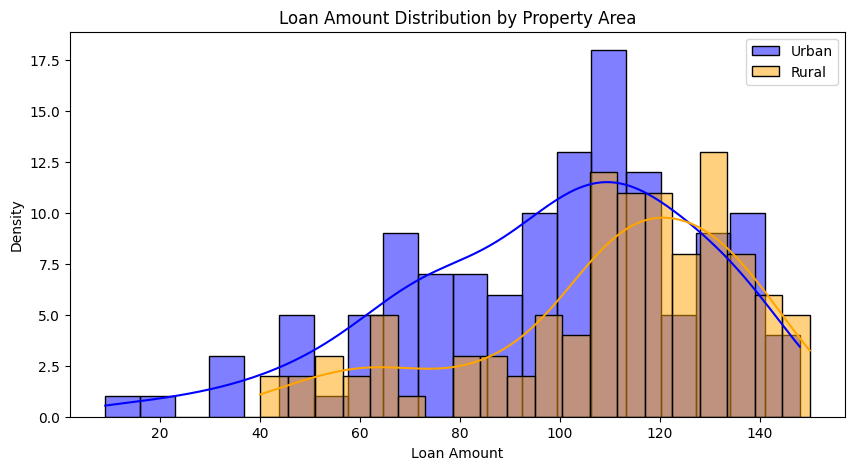

T-statistic: -3.202135108197761
P-value: 0.0015582022139157476
Reject the null hypothesis: There is a significant difference in Loan Amount between Urban and Rural applicants.


In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Splits dataset into Urban and Rural groups
urban_loan_amount = loans[loans["Property_Area"] == "Urban"]["LoanAmount"].dropna()
rural_loan_amount = loans[loans["Property_Area"] == "Rural"]["LoanAmount"].dropna()

# Checks for normality using histograms
plt.figure(figsize=(10, 5))
sns.histplot(urban_loan_amount, kde=True, label="Urban", color="blue", bins=20, alpha=0.5)
sns.histplot(rural_loan_amount, kde=True, label="Rural", color="orange", bins=20, alpha=0.5)
plt.legend()
plt.title("Loan Amount Distribution by Property Area")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.show()

# Performs an independent two-sample t-test (Welch’s t-test assumes unequal variances)
t_stat, p_value = stats.ttest_ind(urban_loan_amount, rural_loan_amount, equal_var=False)

# Prints the test results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # Standard significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Loan Amount between Urban and Rural applicants.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Loan Amount between Urban and Rural applicants.")

## Task 9: Comparing Applicant Income by Self-Employment Status


**Objective:** Determine if there is a significant difference in the mean income of self-employed and non-self-employed applicants.

Write down the Hypothesis for this task.

**Attribute to Use:** ApplicantIncome (continuous) and Self_Employed (categorical with two levels: Yes and No).



In this task, we aim to determine whether there is a significant difference in the mean ApplicantIncome between self-employed and non-self-employed applicants.

Null Hypothesis (H₀): There is no significant difference in the mean income between self-employed and non-self-employed applicants. In other words, the average income of self-employed applicants is the same as that of non-self-employed applicants.

𝐻
0
:
𝜇
Self-Employed
=
𝜇
Non-Self-Employed
H
0
​
 :μ
Self-Employed
​
 =μ
Non-Self-Employed
​

Alternative Hypothesis (H₁): There is a significant difference in the mean income between self-employed and non-self-employed applicants. This suggests that the income of self-employed applicants is different from that of non-self-employed applicants.

𝐻
1
:
𝜇
Self-Employed
≠
𝜇
Non-Self-Employed
H
1
​
 :μ
Self-Employed
​


=μ
Non-Self-Employed
​

In statistical terms, we will compare the mean ApplicantIncome for both groups (self-employed vs. non-self-employed) using an independent two-sample t-test (or a non-parametric test, such as the Mann-Whitney U test, if the data is not normally distributed). If the p-value is less than the significance level (usually 0.05), we will reject the null hypothesis, indicating that there is a statistically significant difference in income between the two groups. If the p-value is greater than 0.05, we will fail to reject the null hypothesis, implying no significant difference in income between self-employed and non-self-employed applicants.

## Task 10:  Comparing Loan Amount by Credit History

**Objective:** Determine if there is a significant difference in the mean loan amount requested by applicants with a credit history that meets guidelines and those who do not.

**Attribute to Use:** LoanAmount (continuous) and Credit_History (categorical with two levels: 1 (meets guidelines) and 0 (does not meet guidelines)).

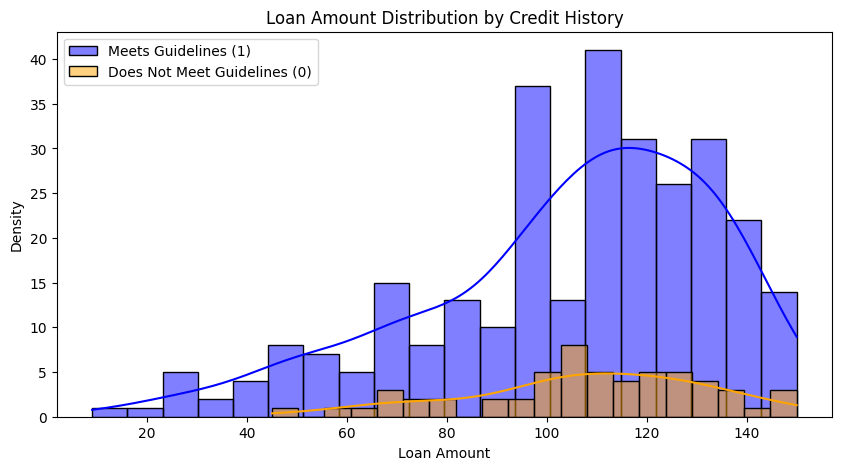

T-statistic: -1.032044769196355
P-value: 0.3047436178015342
Fail to reject the null hypothesis: No significant difference in Loan Amount between applicants with and without a credit history that meets guidelines.


In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Splits the dataset based on Credit History
credit_history_1 = loans[loans["Credit_History"] == 1]["LoanAmount"].dropna()
credit_history_0 = loans[loans["Credit_History"] == 0]["LoanAmount"].dropna()

# Checks for normality using histograms
plt.figure(figsize=(10, 5))
sns.histplot(credit_history_1, kde=True, label="Meets Guidelines (1)", color="blue", bins=20, alpha=0.5)
sns.histplot(credit_history_0, kde=True, label="Does Not Meet Guidelines (0)", color="orange", bins=20, alpha=0.5)
plt.legend()
plt.title("Loan Amount Distribution by Credit History")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.show()

# Performs an independent two-sample t-test (Welch’s t-test for unequal variances)
t_stat, p_value = stats.ttest_ind(credit_history_1, credit_history_0, equal_var=False)

# Prints test results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # Standard significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Loan Amount between applicants with and without a credit history that meets guidelines.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Loan Amount between applicants with and without a credit history that meets guidelines.")

## Task 11: Comparing Loan Amount by Marital Status


**Objective:** Determine if there is a significant difference in the mean loan amount requested by married and unmarried applicants.

**Attribute to Use:** LoanAmount (continuous) and Married (categorical with two levels: Yes and No).

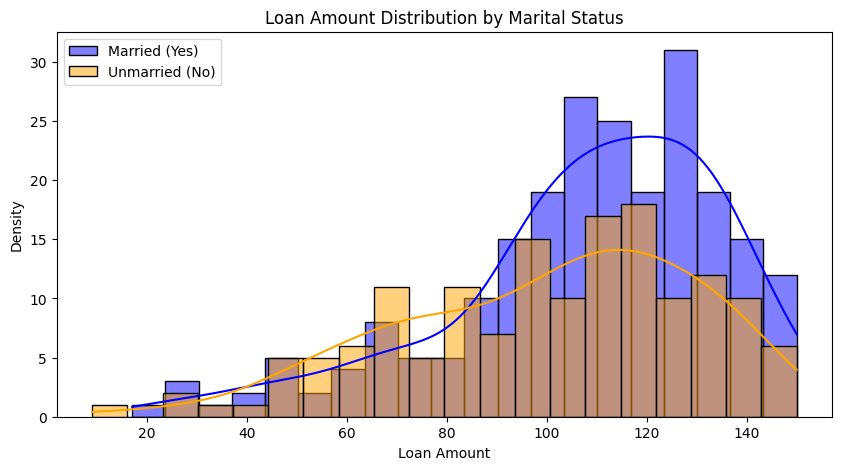

T-statistic: 2.75243603147579
P-value: 0.0062660281314519395
Reject the null hypothesis: There is a significant difference in Loan Amount between married and unmarried applicants.


In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Splits dataset into Married (Yes) and Unmarried (No) groups
married_loan_amount = loans[loans["Married"] == "Yes"]["LoanAmount"].dropna()
unmarried_loan_amount = loans[loans["Married"] == "No"]["LoanAmount"].dropna()

# Checks for normality using histograms
plt.figure(figsize=(10, 5))
sns.histplot(married_loan_amount, kde=True, label="Married (Yes)", color="blue", bins=20, alpha=0.5)
sns.histplot(unmarried_loan_amount, kde=True, label="Unmarried (No)", color="orange", bins=20, alpha=0.5)
plt.legend()
plt.title("Loan Amount Distribution by Marital Status")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.show()

# Performs an independent two-sample t-test (Welch’s t-test assumes unequal variances)
t_stat, p_value = stats.ttest_ind(married_loan_amount, unmarried_loan_amount, equal_var=False)

# Prints test results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # Standard significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Loan Amount between married and unmarried applicants.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Loan Amount between married and unmarried applicants.")

## Task 12: Comparing Applicant Income by Loan Status

**Objective:** Determine if there is a significant difference in the mean income of applicants who were approved for a loan and those who were not.

**Attribute to Use:** ApplicantIncome (continuous) and Loan_Status (categorical with two levels: Y and N).

# Task 12.1: Calculate a 95% Confidence Interval of Income of those applicants who are approved for a loan.



In [15]:
import numpy as np
import scipy.stats as stats

# Filters the data for applicants who were approved for a loan (Loan_Status = "Y")
approved_income = loans[loans["Loan_Status"] == "Y"]["ApplicantIncome"].dropna()

# Calculates sample statistics
mean_income = np.mean(approved_income)
std_income = np.std(approved_income, ddof=1)  # Sample standard deviation
n = len(approved_income)

# Calculates the standard error
se = std_income / np.sqrt(n)

# Calculates the 95% Confidence Interval
confidence_level = 0.95
z_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # z-value for 95% confidence

# Calculates the margin of error
margin_of_error = z_value * se

# Calculates the Confidence Interval
ci_lower = mean_income - margin_of_error
ci_upper = mean_income + margin_of_error

# Prints the results
print(f"Sample Mean Income: {mean_income:.2f}")
print(f"Sample Standard Deviation: {std_income:.2f}")
print(f"Sample Size: {n}")
print(f"95% Confidence Interval for Approved Applicants' Income: ({ci_lower:.2f}, {ci_upper:.2f})")

Sample Mean Income: 3570.66
Sample Standard Deviation: 1440.52
Sample Size: 271
95% Confidence Interval for Approved Applicants' Income: (3399.15, 3742.17)


# Task 13: Comparing Loan Amount by Dependents

**Objective:** Determine if there is a significant difference in the mean loan amount requested by applicants with 0 dependents and those with 1 or more dependents.



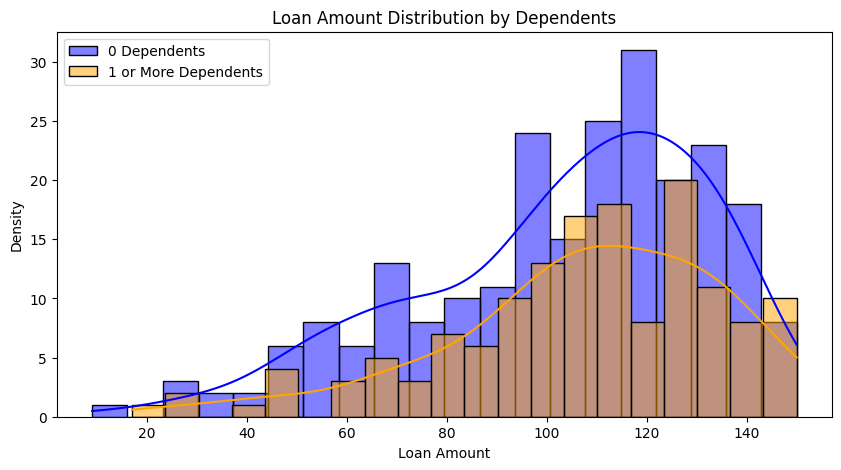

T-statistic: -1.476064361647366
P-value: 0.14090654710978376
Fail to reject the null hypothesis: No significant difference in LoanAmount between applicants with 0 dependents and those with 1 or more dependents.


In [16]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Splits dataset into 0 dependents and 1+ dependents
loans['Dependents'] = loans['Dependents'].apply(lambda x: 0 if x == '0' else 1)  # Convert dependents to numeric: 0 or 1+
zero_dependents = loans[loans["Dependents"] == 0]["LoanAmount"].dropna()
one_or_more_dependents = loans[loans["Dependents"] == 1]["LoanAmount"].dropna()

# Checks for normality using histograms
plt.figure(figsize=(10, 5))
sns.histplot(zero_dependents, kde=True, label="0 Dependents", color="blue", bins=20, alpha=0.5)
sns.histplot(one_or_more_dependents, kde=True, label="1 or More Dependents", color="orange", bins=20, alpha=0.5)
plt.legend()
plt.title("Loan Amount Distribution by Dependents")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.show()

# Performs an independent two-sample t-test (Welch’s t-test assumes unequal variances)
t_stat, p_value = stats.ttest_ind(zero_dependents, one_or_more_dependents, equal_var=False)

# Prints the test results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # Standard significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in LoanAmount between applicants with 0 dependents and those with 1 or more dependents.")
else:
    print("Fail to reject the null hypothesis: No significant difference in LoanAmount between applicants with 0 dependents and those with 1 or more dependents.")

## Task 10: Comparing Loan Amount by Loan Amount Term


**Objective:** Determine if there is a significant difference in the mean loan amount requested by applicants with a loan term of 180 months and those with a loan term of 360 months.

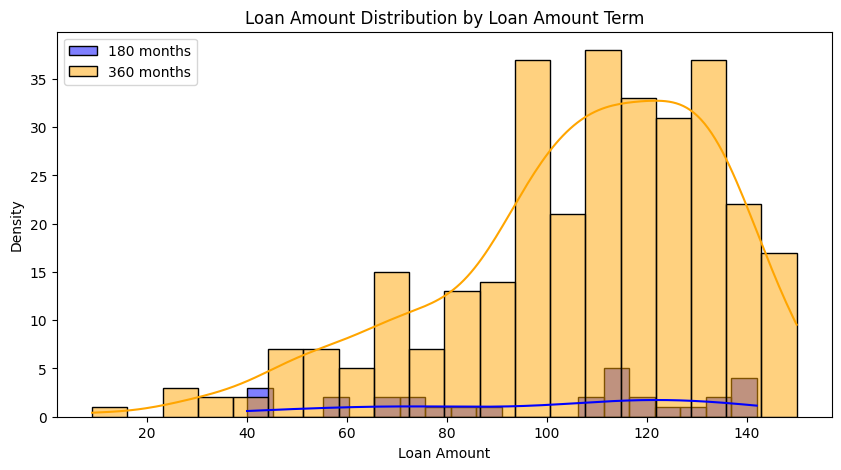

T-statistic: -1.1775553590946832
P-value: 0.24771025910554806
Fail to reject the null hypothesis: No significant difference in Loan Amount between 180 months and 360 months.


In [17]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Filters the dataset based on Loan Amount Term (180 months and 360 months)
loan_term_180 = loans[loans["Loan_Amount_Term"] == 180]["LoanAmount"].dropna()
loan_term_360 = loans[loans["Loan_Amount_Term"] == 360]["LoanAmount"].dropna()

# Checks for normality using histograms
plt.figure(figsize=(10, 5))
sns.histplot(loan_term_180, kde=True, label="180 months", color="blue", bins=20, alpha=0.5)
sns.histplot(loan_term_360, kde=True, label="360 months", color="orange", bins=20, alpha=0.5)
plt.legend()
plt.title("Loan Amount Distribution by Loan Amount Term")
plt.xlabel("Loan Amount")
plt.ylabel("Density")
plt.show()

# Performs an independent two-sample t-test (Welch’s t-test assumes unequal variances)
t_stat, p_value = stats.ttest_ind(loan_term_180, loan_term_360, equal_var=False)

# Prints test results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # Standard significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Loan Amount between 180 months and 360 months.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Loan Amount between 180 months and 360 months.")